<a href="https://colab.research.google.com/github/shashidharraju1648/PythonnBitcoin-data-graphical-representation/blob/main/data_bitcoin_and_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                 timestamp         price
0  2022-03-24 21:01:40.330  43844.788720
1  2022-03-24 22:02:43.482  43951.126978
2  2022-03-24 23:00:39.063  43922.725345
3  2022-03-25 00:02:35.804  43936.096235
4  2022-03-25 01:03:38.966  43935.935608
5  2022-03-25 02:02:46.827  44170.491969
6  2022-03-25 03:00:16.974  43897.023949
7  2022-03-25 04:02:00.066  43948.495060
8  2022-03-25 05:01:26.043  44025.047574
9  2022-03-25 06:02:34.405  44053.684908
10 2022-03-25 07:01:42.660  44050.444973
11 2022-03-25 08:01:25.022  43911.019391
12 2022-03-25 09:02:32.788  43931.350869
13 2022-03-25 10:03:50.516  44094.152884
14 2022-03-25 11:01:55.340  44126.757417
15 2022-03-25 12:00:50.844  44575.120955
16 2022-03-25 13:01:21.367  44771.665945
17 2022-03-25 14:03:26.177  44946.404093
18 2022-03-25 15:03:03.989  44826.286336
19 2022-03-25 16:03:42.747  44255.980379
20 2022-03-25 17:03:22.030  44221.534115
21 2022-03-25 18:00:15.621  44253.248750
22 2022-03-25 19:02:03.153  44445.732251
23 2022-03-25 20

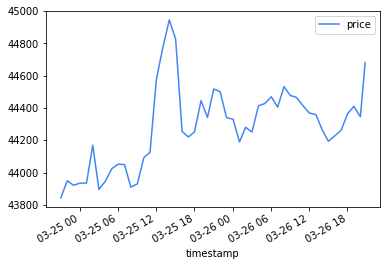

In [ ]:
from time import time
from urllib import response
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

#The above libraries are datetime-for-timestamp, requests-to-scrape data, 
#pandas-for-datasets, matplotlib-for-graphical representation

#available_crypto function is to find available coins in the api.
def available_crypto():
    #url is the page where all the raw data is displayed
    url = f'https://api.coingecko.com/api/v3/coins'

    response = requests.get(url)
    data = response.json()


    crypto_ids = []


    for asset in data:
        crypto_ids.append(asset['id'])

    return crypto_ids

#print(available_crypto())

#get_market_chart function is to track the market of crypto
def get_market_chart(coin_id=['bitcoin','etherum'],vs_currency='usd',days='max', interval='daily'):
    crypto_ids = available_crypto()


    if coin_id in crypto_ids:
        url = f'https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart'
        payload = {'vs_currency': vs_currency, 'days': days, 'interval': interval}
        response =  requests.get(url,params=payload)
        data = response.json()

        timestamp_list, price_list = [], []

        for price in data['prices']:
            timestamp_list.append(datetime.datetime.fromtimestamp(price[0]/1000))
            price_list.append(price[1])


        raw_data ={
            'timestamp': timestamp_list,
            'price': price_list
        }

        df = pd.DataFrame(raw_data)

        return df

    
    else:
        print("not avaoilble")
        print(crypto_ids)



#market_info = get_market_chart('bitcoin','usd', '3800')
market_info = get_market_chart(days='2', interval='hourly')

print(market_info)


market_info.plot(y='price', x='timestamp', color='#4285F4')
plt.show()

